In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()

df = pd.read_stata('pwt91.dta').set_index(['country','year'])
df['gdppc'] = df['rgdpe']/df['pop']
df['rgdppc'] = df['rgdpna']/df['pop']
df['growth'] = np.log(df.unstack(0)['rgdppc']).diff().rolling(5).mean().stack(0).reset_index().set_index(['country','year'])[0]
df['cgdppc'] = df['cgdpe']/df['pop']
df['level'] = df['cgdppc']/df['cgdppc'].xs('United States',level=0)

df.head()

countrycode   currency_unit  rgdpe  rgdpo  pop  emp  avh  hc  \
country year                                                                
Aruba   1950         ABW  Aruban Guilder    NaN    NaN  NaN  NaN  NaN NaN   
        1951         ABW  Aruban Guilder    NaN    NaN  NaN  NaN  NaN NaN   
        1952         ABW  Aruban Guilder    NaN    NaN  NaN  NaN  NaN NaN   
        1953         ABW  Aruban Guilder    NaN    NaN  NaN  NaN  NaN NaN   
        1954         ABW  Aruban Guilder    NaN    NaN  NaN  NaN  NaN NaN   

              ccon  cda  ...  pl_g  pl_x  pl_m  pl_n  pl_k  gdppc  rgdppc  \
country year             ...                                                
Aruba   1950   NaN  NaN  ...   NaN   NaN   NaN   NaN   NaN    NaN     NaN   
        1951   NaN  NaN  ...   NaN   NaN   NaN   NaN   NaN    NaN     NaN   
        1952   NaN  NaN  ...   NaN   NaN   NaN   NaN   NaN    NaN     NaN   
        1953   NaN  NaN  ...   NaN   NaN   NaN   NaN   NaN    NaN     NaN   
        1954   NaN  NaN  ...   NaN   NaN   NaN   NaN   NaN    NaN     NaN   

              growth  cgdppc  level  
country year                         
Aruba   1950     NaN     NaN    NaN  
        1951     NaN     NaN    NaN  
        1952     NaN     NaN    NaN  
        1953     NaN     NaN    NaN  
        1954     NaN     NaN    NaN  

[5 rows x 55 columns]

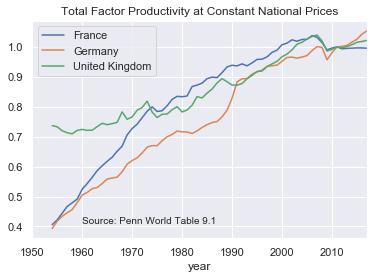

In [5]:
df.loc['France','rtfpna'].plot(label='France')
df.loc['Germany','rtfpna'].plot(label='Germany')
df.loc['United Kingdom','rtfpna'].plot(label='United Kingdom')

plt.legend()
plt.title('Total Factor Productivity at Constant National Prices')
plt.text(1960,0.41,'Source: Penn World Table 9.1')
plt.savefig('pwt91_tfp.png',dpi=200)

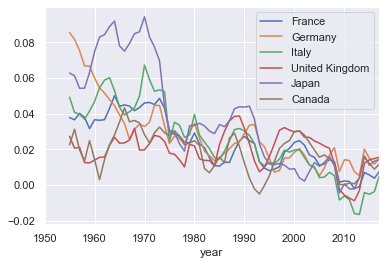

In [55]:
df.loc['France','growth'].plot(label='France')
df.loc['Germany','growth'].plot(label='Germany')
df.loc['Italy','growth'].plot(label='Italy')
df.loc['United Kingdom','growth'].plot(label='United Kingdom')
df.loc['Japan','growth'].plot(label='Japan')
df.loc['Canada','growth'].plot(label='Canada')
plt.legend()

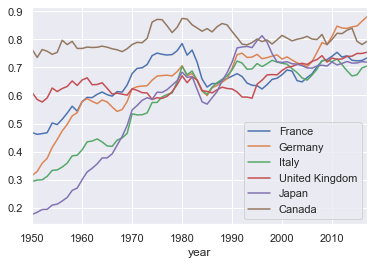

In [56]:
df.loc['France','level'].plot(label='France')
df.loc['Germany','level'].plot(label='Germany')
df.loc['Italy','level'].plot(label='Italy')
df.loc['United Kingdom','level'].plot(label='United Kingdom')
df.loc['Japan','level'].plot(label='Japan')
df.loc['Canada','level'].plot(label='Canada')
plt.legend()

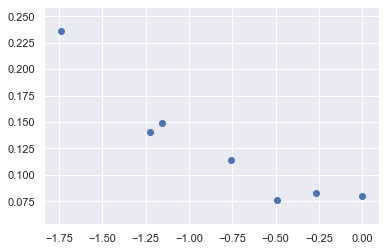

In [67]:
import statsmodels.api as sm
G7 = ['Canada','France','Germany','Italy','Japan','United Kingdom','United States']

plt.scatter(np.log(df.loc[(G7,1950),'level']),df.loc[(G7,1970),'rgdppc'].values/df.loc[(G7,1950),'rgdppc'].values/20)